In [43]:
import os
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

path = os.path.abspath(os.path.dirname(os.getcwd())) + '\\data'

In [44]:
info_article = pd.read_csv(path+'\\info\\info_article_o_6.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_6.csv')

In [45]:
info_article.head()

,number_volume,number_issue,number_article,year,period,type_decide,type_1,type_2,name_book,name_book_len,...,author_info,page_start,page_end,page_quant,date_receive,date_accept,date_online,views,Crossref,Web_of_Science
0,1,1,1,1999,1999-1,introduction,introduction,Introduction,introduction,12.0,...,"[('Thomas P. Boje', 'male', ' Department of So...",1,7,7,NaN,NaN,21 Oct 2013,26,1,0
1,1,1,2,1999,1999-1,article,Article,Original Articles,national models for making and legitimating el...,50.0,...,"[('Michel Bauer', 'male', ' Observatoire des D...",9,31,23,NaN,NaN,21 Oct 2013,78,14,0
2,1,1,3,1999,1999-1,article,Article,Original Articles,"models of the family, women’s role and social ...",52.0,...,"[('Catherine Hakim', 'female', ' London School...",33,58,26,NaN,NaN,21 Oct 2013,441,15,0
3,1,1,4,1999,1999-1,article,Article,Original Articles,the european union and equal opportunities pol...,51.0,...,"[('Sylvia Walby', 'female', ' University of Le...",59,80,22,NaN,NaN,21 Oct 2013,142,13,0
4,1,1,5,1999,1999-1,article,Article,Original Articles,private and public transfers between generatio...,82.0,...,"[('Martin Kohli', 'male', ' Free University of...",81,104,24,NaN,NaN,21 Oct 2013,371,194,0


In [46]:
info_issue.head()

,number_volume,number_issue,article_quant,year,period,name_book_len_mean,name_book_len_std,page_start,page_end,page_start_mod,page_end_mod,page_quant_1,page_quant_2,theme,special_1
0,1,1,7,1999,1999-1,44.714286,24.958060,1,131,1,131,131,129,NaN,0
1,1,2,7,1999,1999-2,37.000000,18.814888,133,318,133,318,186,183,NaN,0
2,1,3,6,1999,1999-3,45.666667,43.070485,319,499,319,499,181,180,NaN,0
3,2,1,6,2000,2000-1,25.666667,11.944315,1,108,1,108,108,110,NaN,0
4,2,2,5,2000,2000-2,34.000000,23.227139,113,238,113,238,126,124,NaN,0


In [47]:
# part 1: length of articles over time

def page_analysis(info_article):
    
    page_quant = info_article['page_quant']
    
    page_quant_min = info_article.sort_values(by='page_quant', ascending=True).reset_index()
    page_quant_max = info_article.sort_values(by='page_quant', ascending=False).reset_index()
    
    print('Mean length of articles: '+str(page_quant.mean())+' page(s)')
    print()
    
    print('Min length of titles: '+str(page_quant.min())+' page(s)')
    print('The shortest length is: \n'+str(page_quant_min.loc[0, 'page_quant']))
    print('Volume No.'+str(page_quant_min.loc[0, 'number_volume'])+
          ', Issue No.'+str(page_quant_min.loc[0, 'number_issue'])+
          ', Article No.'+str(page_quant_min.loc[0, 'number_article']))
    print()
    
    print('Max length of titles: '+str(page_quant.max())+' pages')
    print('The longest length is: \n'+str(page_quant_max.loc[0, 'page_quant']))
    print('Volume No.'+str(page_quant_max.loc[0, 'number_volume'])+
          ', Issue No.'+str(page_quant_max.loc[0, 'number_issue'])+
          ', Article No.'+str(page_quant_max.loc[0, 'number_article']))

In [48]:
page_analysis(info_article)

Mean length of articles: 18.45023148148148 page(s)

Min length of titles: 1 page(s)
The shortest length is: 
1
Volume No.14, Issue No.3, Article No.9

Max length of titles: 45 pages
The longest length is: 
45
Volume No.5, Issue No.2, Article No.1


In [49]:
def describe_page_1(info_article):
    
    quant = info_article['page_quant']
    
    mean = quant.mean()
    std = quant.std()
    
    x_axis_value = info_issue['period'].values
    
    x = info_article['period'].values
    y = info_article['page_quant'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Length of Article (pages)', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-5,55)
    ax.set_xticks(range(0,len(x_axis_value),10))
    # ax.set_xticklabels() 
    
    ax.hlines(mean+2*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#F7B706')
    
    ax.hlines(mean-2*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#F7B706')
    
    ax.fill_between([0,len(x_axis_value)-1],
                    mean-2*std, mean+2*std,
                    alpha=0.065, color='#F7B706')
    
    ax.text(0, 45, 
            r'$\mu = $'+str(format(mean,'.4f'))+'\n'+
            r'$\sigma = $'+str(format(std,'.4f')))
    
    
    ax.scatter(x, y, marker='o',s=9,
               facecolors='none',edgecolors='black')

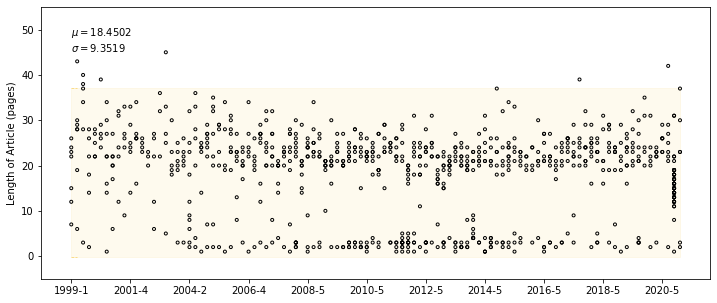

In [50]:
describe_page_1(info_article)

In [54]:
issue_group_help_1 = info_article['page_quant'].groupby([info_article['number_volume'], 
                                                         info_article['number_issue']]).mean()
issue_group_help_2 = info_article['page_quant'].groupby([info_article['number_volume'], 
                                                         info_article['number_issue']]).std()
issue_group = pd.DataFrame(issue_group_help_1._stat_axis.values.tolist(),
                           columns = ['number_volume', 'number_issue'])

issue_group['page_quant_mean'] = issue_group_help_1.values
issue_group['page_quant_std'] = issue_group_help_2.values

info_issue = pd.merge(info_issue, issue_group, how = 'left')
#info_issue.columns.values

info_issue = info_issue[['number_volume', 'number_issue', 'article_quant', 
                         'year', 'period',
                         'name_book_len_mean', 'name_book_len_std',
                         'page_start', 'page_end', 'page_start_mod', 'page_end_mod',
                         'page_quant_1', 'page_quant_2', 
                         'page_quant_mean', 'page_quant_std',
                         'theme', 'special_1']]
info_issue.tail()

,number_volume,number_issue,article_quant,year,period,name_book_len_mean,name_book_len_std,page_start,page_end,page_start_mod,page_end_mod,page_quant_1,page_quant_2,page_quant_mean,page_quant_std,theme,special_1
99,22,4,6,2020,2020-4,78.666667,16.548917,411,527,411,527,117,117,19.500000,8.117881,NaN,0
100,22,5,6,2020,2020-5,106.333333,27.383693,529,681,529,681,153,153,25.500000,2.258318,NaN,0
101,23,1,8,2021,2021-1,90.750000,36.149491,1,191,1,191,191,191,23.875000,11.063938,NaN,0
102,23,S1,61,2021,2021-S1,101.885246,26.535573,1,956,1,956,956,956,15.672131,4.357833,European Societies in the Time of the Coronavi...,1
103,23,2,6,2021,2021-2,80.166667,42.527246,193,310,193,310,118,118,19.666667,14.278188,NaN,0


In [55]:
info_issue.to_csv(path+'\\info\\info_issue_o_7.csv',index=False,sep=',')
info_article.to_csv(path+'\\info\\info_article_o_7.csv',index=False,sep=',')

In [ ]:
info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [58]:
def describe_page_2(info_issue):
    
    x = info_issue['period'].values
    y_mean = info_issue['page_quant_mean'].values
    y_std = info_issue['page_quant_std'].values
    
    y = y_mean
    y_low = y_mean-2*y_std
    y_high = y_mean+2*y_std
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Average Length of Article (pages)', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-15,65)
    ax.set_xticks(range(0,len(x),10))#， rotation=45
    # ax.set_xticklabels() 
    
    ax.plot(x, y, color='#F7B706')
    ax.plot(x, y_low, color='#F7B706', linestyle='--', linewidth=0.75, alpha=0.55)
    ax.plot(x, y_high, color='#F7B706', linestyle='--', linewidth=0.75, alpha=0.55)
    
    ax.fill_between(x, y_low, y_high,
                    alpha=0.065, color='#F7B706')

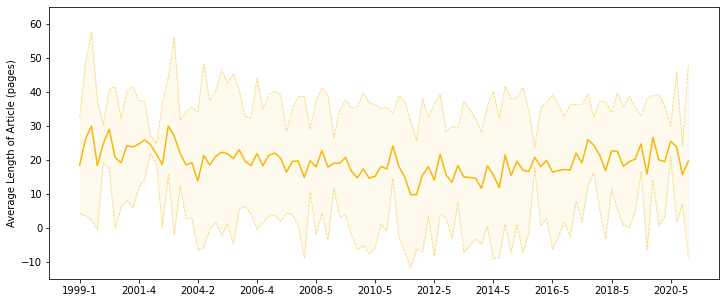

In [59]:
describe_page_2(info_issue)

In [168]:
# modification

# replace the CI with the minimum and maximum number of pages per article

info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [164]:
issue_group_help_1 = info_article['page_quant'].groupby([info_article['number_volume'], 
                                                         info_article['number_issue']]).min()
issue_group_help_2 = info_article['page_quant'].groupby([info_article['number_volume'], 
                                                         info_article['number_issue']]).max()
issue_group = pd.DataFrame(issue_group_help_1._stat_axis.values.tolist(),
                           columns = ['number_volume', 'number_issue'])

issue_group['page_quant_min'] = issue_group_help_1.values
issue_group['page_quant_max'] = issue_group_help_2.values

info_issue = pd.merge(info_issue, issue_group, how = 'left')

info_issue = info_issue[['number_volume', 'number_issue', 'article_quant', 
                         'year', 'period',
                         'name_book_len_mean', 'name_book_len_std',
                         'page_start', 'page_end', 'page_start_mod', 'page_end_mod',
                         'page_quant_1', 'page_quant_2', 
                         'page_quant_mean', 'page_quant_std','page_quant_min','page_quant_max',
                         'theme', 'special_1']]

In [165]:
info_issue.to_csv(path+'\\info\\info_issue_o_7.csv',index=False,sep=',')
info_issue.head()

,number_volume,number_issue,article_quant,year,period,name_book_len_mean,name_book_len_std,page_start,page_end,page_start_mod,page_end_mod,page_quant_1,page_quant_2,page_quant_mean,page_quant_std,page_quant_min,page_quant_max,theme,special_1
0,1,1,7,1999,1999-1,44.714286,24.958060,1,131,1,131,131,129,18.428571,7.138094,7,26,NaN,0
1,1,2,7,1999,1999-2,37.000000,18.814888,133,318,133,318,186,183,26.142857,11.334734,6,43,NaN,0
2,1,3,6,1999,1999-3,45.666667,43.070485,319,499,319,499,181,180,30.000000,13.870833,3,40,NaN,0
3,2,1,6,2000,2000-1,25.666667,11.944315,1,108,1,108,108,110,18.333333,9.500877,2,28,NaN,0
4,2,2,5,2000,2000-2,34.000000,23.227139,113,238,113,238,126,124,24.800000,2.774887,22,28,NaN,0


In [166]:
def describe_page_3(info_issue):
    
    x = info_issue['period'].values
    
    y_mean = info_issue['page_quant_mean'].values
    
    y_low = info_issue['page_quant_min'].values
    y_high = info_issue['page_quant_max'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Average Length of Article (pages)', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-15,65)
    ax.set_xticks(range(0,len(x),10))#， rotation=45
    # ax.set_xticklabels() 
    
    ax.plot(x, y_mean, color='#F7B706')
    ax.plot(x, y_low, color='#F7B706', linestyle='--', linewidth=0.75, alpha=0.55)
    ax.plot(x, y_high, color='#F7B706', linestyle='--', linewidth=0.75, alpha=0.55)
    
    ax.fill_between(x, y_low, y_high,
                    alpha=0.065, color='#F7B706')

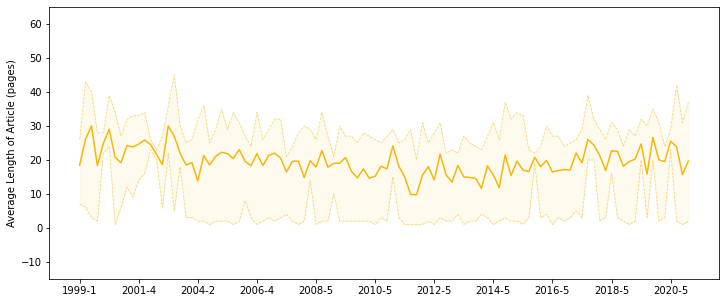

In [167]:
describe_page_3(info_issue)

In [60]:
# part 2: number of authors over time

def author_analysis(info_article):
    
    author_number = info_article['author_number']
    
    author_number_min = info_article.sort_values(by='author_number', ascending=True).reset_index()
    author_number_max = info_article.sort_values(by='author_number', ascending=False).reset_index()
    
    print('Mean number of authors: '+str(author_number.mean())+' person(s)')
    print()
    
    print('Min number of authors: '+str(author_number.min())+' person(s)')
    print('The minimum number is: \n'+str(author_number_min.loc[0, 'author_number']))
    print('Volume No.'+str(author_number_min.loc[0, 'number_volume'])+
          ', Issue No.'+str(author_number_min.loc[0, 'number_issue'])+
          ', Article No.'+str(author_number_min.loc[0, 'number_article']))
    print()
    
    print('Max number of authors: '+str(author_number.max())+' persons')
    print('The maximum number is: \n'+str(author_number_max.loc[0, 'author_number']))
    print('Volume No.'+str(author_number_max.loc[0, 'number_volume'])+
          ', Issue No.'+str(author_number_max.loc[0, 'number_issue'])+
          ', Article No.'+str(author_number_max.loc[0, 'number_article']))

In [61]:
author_analysis(info_article)

Mean number of authors: 1.6909722222222223 person(s)

Min number of authors: 0 person(s)
The minimum number is: 
0
Volume No.7, Issue No.4, Article No.5

Max number of authors: 22 persons
The maximum number is: 
22
Volume No.21, Issue No.1, Article No.4


In [64]:
def describe_author_1(info_article):
    
    number = info_article['author_number']
    
    mean = number.mean()
    std = number.std()
    
    x_axis_value = info_issue['period'].values
    
    x = info_article['period'].values
    y = info_article['author_number'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Number of Authors (persons)', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-5,25)
    ax.set_xticks(range(0,len(x_axis_value),10))
    # ax.set_xticklabels() 
    
    ax.hlines(mean+2*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#d73027')
    
    ax.hlines(mean-2*std, xmin=0, xmax=1,
              linestyle='--', linewidth=0.75, alpha=0.55, color='#d73027')
    
    ax.fill_between([0,len(x_axis_value)-1],
                    mean-2*std, mean+2*std,
                    alpha=0.065, color='#d73027')
    
    ax.text(0, 20, 
            r'$\mu = $'+str(format(mean,'.4f'))+'\n'+
            r'$\sigma = $'+str(format(std,'.4f')))
    
    
    ax.scatter(x, y, marker='o',s=9,
               facecolors='none',edgecolors='black')

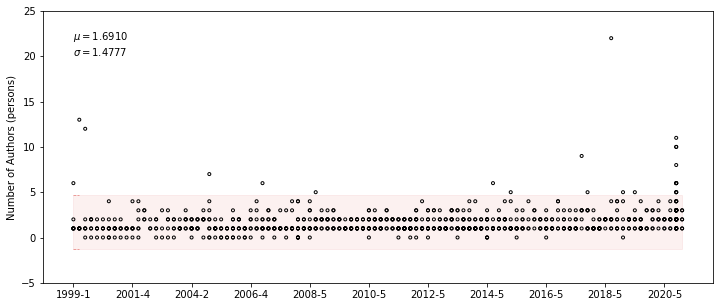

In [65]:
describe_author_1(info_article)

In [170]:
issue_group_help_1 = info_article['author_number'].groupby([info_article['number_volume'], 
                                                            info_article['number_issue']]).mean()
issue_group_help_2 = info_article['author_number'].groupby([info_article['number_volume'], 
                                                            info_article['number_issue']]).std()
issue_group = pd.DataFrame(issue_group_help_1._stat_axis.values.tolist(),
                           columns = ['number_volume', 'number_issue'])

issue_group['author_number_mean'] = issue_group_help_1.values
issue_group['author_number_std'] = issue_group_help_2.values

info_issue = pd.merge(info_issue, issue_group, how = 'left')

info_issue = info_issue[['number_volume', 'number_issue', 'article_quant', 
                         'year', 'period',
                         'name_book_len_mean', 'name_book_len_std',
                         'page_start', 'page_end', 'page_start_mod', 'page_end_mod',
                         'page_quant_1', 'page_quant_2', 
                         'page_quant_mean', 'page_quant_std',
                         'page_quant_min','page_quant_max',
                         'author_number_mean', 'author_number_std',
                         'theme', 'special_1']]

info_issue.tail()

,number_volume,number_issue,article_quant,year,period,name_book_len_mean,name_book_len_std,page_start,page_end,page_start_mod,...,page_quant_1,page_quant_2,page_quant_mean,page_quant_std,page_quant_min,page_quant_max,author_number_mean,author_number_std,theme,special_1
99,22,4,6,2020,2020-4,78.666667,16.548917,411,527,411,...,117,117,19.500000,8.117881,3,24,2.333333,1.032796,NaN,0
100,22,5,6,2020,2020-5,106.333333,27.383693,529,681,529,...,153,153,25.500000,2.258318,23,29,1.666667,0.516398,NaN,0
101,23,1,8,2021,2021-1,90.750000,36.149491,1,191,1,...,191,191,23.875000,11.063938,2,42,2.125000,0.991031,NaN,0
102,23,S1,61,2021,2021-S1,101.885246,26.535573,1,956,1,...,956,956,15.672131,4.357833,1,31,3.131148,2.239609,European Societies in the Time of the Coronavi...,1
103,23,2,6,2021,2021-2,80.166667,42.527246,193,310,193,...,118,118,19.666667,14.278188,2,37,2.000000,0.894427,NaN,0


In [172]:
info_issue.to_csv(path+'\\info\\info_issue_o_7.csv',index=False,sep=',')
info_article.to_csv(path+'\\info\\info_article_o_7.csv',index=False,sep=',')

In [173]:
info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [76]:
def describe_author_2(info_issue):
    
    x = info_issue['period'].values
    y_mean = info_issue['author_number_mean'].values
    y_std = info_issue['author_number_std'].values
    
    y = y_mean
    y_low = y_mean-2*y_std
    y_high = y_mean+2*y_std
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Average Number of Authors (persons)', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-15,25)
    ax.set_xticks(range(0,len(x),10))#， rotation=45
    # ax.set_xticklabels() 
    
    ax.plot(x, y, color='#d73027')
    ax.plot(x, y_low, color='#d73027', linestyle='--', linewidth=0.75, alpha=0.55)
    ax.plot(x, y_high, color='#d73027', linestyle='--', linewidth=0.75, alpha=0.55)
    
    ax.fill_between(x, y_low, y_high,
                    alpha=0.065, color='#d73027')

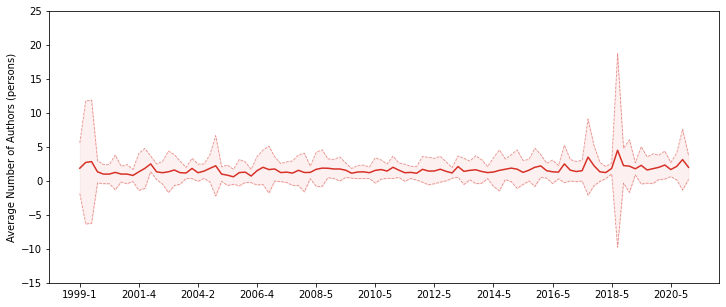

In [77]:
describe_author_2(info_issue)

In [174]:
# modification

# replace the CI with the minimum and maximum number of pages per article

info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [175]:
issue_group_help_1 = info_article['author_number'].groupby([info_article['number_volume'], 
                                                            info_article['number_issue']]).min()
issue_group_help_2 = info_article['author_number'].groupby([info_article['number_volume'], 
                                                            info_article['number_issue']]).max()
issue_group = pd.DataFrame(issue_group_help_1._stat_axis.values.tolist(),
                           columns = ['number_volume', 'number_issue'])

issue_group['author_number_min'] = issue_group_help_1.values
issue_group['author_number_max'] = issue_group_help_2.values

info_issue = pd.merge(info_issue, issue_group, how = 'left')

info_issue = info_issue[['number_volume', 'number_issue', 'article_quant', 
                         'year', 'period',
                         'name_book_len_mean', 'name_book_len_std',
                         'page_start', 'page_end', 'page_start_mod', 'page_end_mod',
                         'page_quant_1', 'page_quant_2', 
                         'page_quant_mean', 'page_quant_std',
                         'page_quant_min', 'page_quant_max',
                         'author_number_mean', 'author_number_std',
                         'author_number_min', 'author_number_max',
                         'theme', 'special_1']]

info_issue.tail()

,number_volume,number_issue,article_quant,year,period,name_book_len_mean,name_book_len_std,page_start,page_end,page_start_mod,...,page_quant_mean,page_quant_std,page_quant_min,page_quant_max,author_number_mean,author_number_std,author_number_min,author_number_max,theme,special_1
99,22,4,6,2020,2020-4,78.666667,16.548917,411,527,411,...,19.500000,8.117881,3,24,2.333333,1.032796,1,4,NaN,0
100,22,5,6,2020,2020-5,106.333333,27.383693,529,681,529,...,25.500000,2.258318,23,29,1.666667,0.516398,1,2,NaN,0
101,23,1,8,2021,2021-1,90.750000,36.149491,1,191,1,...,23.875000,11.063938,2,42,2.125000,0.991031,1,4,NaN,0
102,23,S1,61,2021,2021-S1,101.885246,26.535573,1,956,1,...,15.672131,4.357833,1,31,3.131148,2.239609,1,11,European Societies in the Time of the Coronavi...,1
103,23,2,6,2021,2021-2,80.166667,42.527246,193,310,193,...,19.666667,14.278188,2,37,2.000000,0.894427,1,3,NaN,0


In [176]:
info_issue.to_csv(path+'\\info\\info_issue_o_7.csv',index=False,sep=',')
info_article.to_csv(path+'\\info\\info_article_o_7.csv',index=False,sep=',')

In [177]:
info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [183]:
def describe_author_3(info_issue):
    
    x = info_issue['period'].values
    
    y_mean = info_issue['author_number_mean'].values
    y_low = info_issue['author_number_min'].values
    y_high = info_issue['author_number_max'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Average Number of Authors (persons)', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-3,25)
    ax.set_xticks(range(0,len(x),10))#， rotation=45
    # ax.set_xticklabels() 
    
    ax.plot(x, y_mean, color='#d73027')
    ax.plot(x, y_low, color='#d73027', linestyle='--', linewidth=0.75, alpha=0.55)
    ax.plot(x, y_high, color='#d73027', linestyle='--', linewidth=0.75, alpha=0.55)
    
    ax.fill_between(x, y_low, y_high,
                    alpha=0.065, color='#d73027')

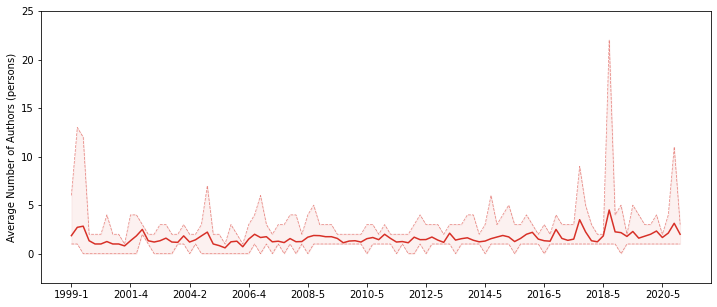

In [184]:
describe_author_3(info_issue)

In [197]:
# share of solo-authored articles

info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [198]:
info_article['author_one'] = info_article['author_number'] == 1
issue_group_help = info_article['author_one'].groupby([info_article['number_volume'], 
                                                       info_article['number_issue']]).sum()

issue_group = pd.DataFrame(issue_group_help._stat_axis.values.tolist(),
                           columns = ['number_volume', 'number_issue'])

issue_group['article_one_quant'] = issue_group_help.values

info_issue = pd.merge(info_issue, issue_group, how = 'left')

In [209]:
for i_issue in range(info_issue.shape[0]):
    
    one = info_issue.iloc[i_issue]['article_one_quant']
    total = info_issue.iloc[i_issue]['article_quant']
    
    info_issue.loc[i_issue, 'article_one_share'] = one/total

In [212]:
# info_issue.columns.values

info_issue = info_issue[['number_volume', 'number_issue', 
                         'article_quant', 'article_one_quant', 'article_one_share',
                         'year', 'period',
                         'name_book_len_mean', 'name_book_len_std', 
                         'page_start', 'page_end', 'page_start_mod', 'page_end_mod', 
                         'page_quant_1', 'page_quant_2', 
                         'page_quant_mean', 'page_quant_std',
                         'page_quant_min', 'page_quant_max', 
                         'author_number_mean', 'author_number_std', 
                         'author_number_min', 'author_number_max',
                         'theme', 'special_1']]

info_issue.head()

,number_volume,number_issue,article_quant,article_one_quant,article_one_share,year,period,name_book_len_mean,name_book_len_std,page_start,...,page_quant_mean,page_quant_std,page_quant_min,page_quant_max,author_number_mean,author_number_std,author_number_min,author_number_max,theme,special_1
0,1,1,7,5,0.714286,1999,1999-1,44.714286,24.958060,1,...,18.428571,7.138094,7,26,1.857143,1.864454,1,6,NaN,0
1,1,2,7,6,0.857143,1999,1999-2,37.000000,18.814888,133,...,26.142857,11.334734,6,43,2.714286,4.535574,1,13,NaN,0
2,1,3,6,3,0.500000,1999,1999-3,45.666667,43.070485,319,...,30.000000,13.870833,3,40,2.833333,4.535049,0,12,NaN,0
3,2,1,6,2,0.333333,2000,2000-1,25.666667,11.944315,1,...,18.333333,9.500877,2,28,1.333333,0.816497,0,2,NaN,0
4,2,2,5,3,0.600000,2000,2000-2,34.000000,23.227139,113,...,24.800000,2.774887,22,28,1.000000,0.707107,0,2,NaN,0


In [213]:
info_issue.to_csv(path+'\\info\\info_issue_o_7.csv',index=False,sep=',')

In [214]:
info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [233]:
def describe_author_4(info_issue):
    
    x = info_issue['period'].values
    y = info_issue['article_one_share'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Percentage of Solo-authored Articles', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-0.3,1.3)
    ax.set_xticks(range(0,len(x),10))
    # ax.set_xticklabels() 
    
    ax.plot(x, y, color='#d73027', linestyle=':', marker='.')

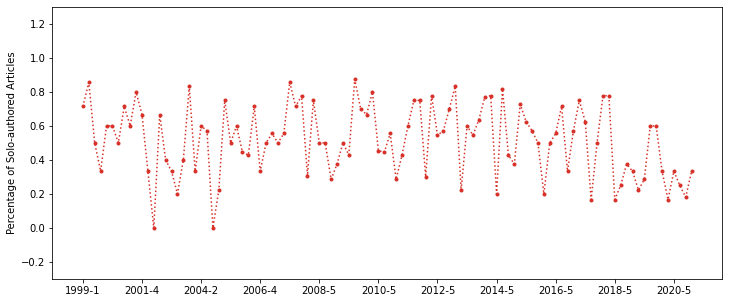

In [234]:
describe_author_4(info_issue)

In [220]:
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_7.csv')

In [221]:
issue_group_help = info_issue['article_one_quant'].groupby([info_issue['year']]).sum()

article_one_quant = issue_group_help.values.tolist()

info_year['article_one_quant'] = article_one_quant

In [224]:
info_year['article_one_share'] = info_year.apply(lambda x: x['article_one_quant']/x['article_quant'],axis=1)

In [228]:
# info_year.columns.values
info_year = info_year[['year', 'article_quant', 'article_one_quant',
                       'article_one_share', 'number_review']]
info_year.head()

,year,article_quant,article_one_quant,article_one_share,number_review
0,1999,20,14,0.700000,4
1,2000,24,12,0.500000,4
2,2001,23,16,0.695652,4
3,2002,18,6,0.333333,2
4,2003,19,9,0.473684,1


In [229]:
info_year.to_csv(path+'\\info\\info_year_o_7.csv',index=False,sep=',')

In [230]:
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_7.csv')

In [235]:
def describe_author_5(info_year):
    
    x = info_year['year'].values
    y = info_year['article_one_share'].values
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Percentage of Solo-authored Articles', fontsize=10)
    
    ax.set_ylim(-0.3,1.3)
    # ax.set_xticks(range(0,len(x),4))
    # ax.set_xticklabels() 
    
    ax.plot(x, y, color='#d73027', linestyle=':', marker='.')

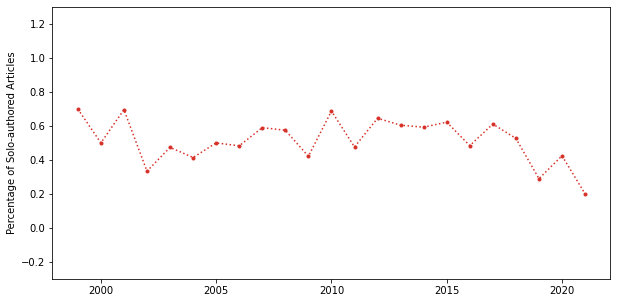

In [236]:
describe_author_5(info_year)

In [86]:
# part 3: number of book reviews over time

info_article['type_decide_review'] = info_article['type_decide'] == 'book review'
issue_group_help = info_article['type_decide_review'].groupby([info_article['number_volume'], 
                                                               info_article['number_issue']]).sum()

issue_group = pd.DataFrame(issue_group_help._stat_axis.values.tolist(),
                           columns = ['number_volume', 'number_issue'])

issue_group['number_review'] = issue_group_help.values

info_issue = pd.merge(info_issue, issue_group, how = 'left')

info_issue = info_issue[['number_volume', 'number_issue', 'article_quant', 
                         'year', 'period',
                         'name_book_len_mean', 'name_book_len_std',
                         'page_start', 'page_end', 'page_start_mod', 'page_end_mod',
                         'page_quant_1', 'page_quant_2', 
                         'page_quant_mean', 'page_quant_std',
                         'author_number_mean', 'author_number_std', 'number_review',
                         'theme', 'special_1']]

info_issue.head()

,number_volume,number_issue,article_quant,year,period,name_book_len_mean,name_book_len_std,page_start,page_end,page_start_mod,page_end_mod,page_quant_1,page_quant_2,page_quant_mean,page_quant_std,author_number_mean,author_number_std,number_review,theme,special_1
0,1,1,7,1999,1999-1,44.714286,24.958060,1,131,1,131,131,129,18.428571,7.138094,1.857143,1.864454,1,NaN,0
1,1,2,7,1999,1999-2,37.000000,18.814888,133,318,133,318,186,183,26.142857,11.334734,2.714286,4.535574,2,NaN,0
2,1,3,6,1999,1999-3,45.666667,43.070485,319,499,319,499,181,180,30.000000,13.870833,2.833333,4.535049,1,NaN,0
3,2,1,6,2000,2000-1,25.666667,11.944315,1,108,1,108,108,110,18.333333,9.500877,1.333333,0.816497,1,NaN,0
4,2,2,5,2000,2000-2,34.000000,23.227139,113,238,113,238,126,124,24.800000,2.774887,1.000000,0.707107,1,NaN,0


In [87]:
info_issue.to_csv(path+'\\info\\info_issue_o_7.csv',index=False,sep=',')

In [141]:
info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [142]:
def describe_book_review(info_issue):
    
    x = info_issue['period'].values
    y = info_issue['number_review'].values
    
    fig = plt.figure(figsize = (12,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Number of Book Reviews', fontsize=10)
    
    # ax.set_xlim('1999-01-01','2021-01-01')
    ax.set_ylim(-1,7)
    ax.set_xticks(range(0,len(x),10))
    # ax.set_xticklabels() 
    
    ax.plot(x, y, color='#2ca02c', linestyle=':', marker='.')

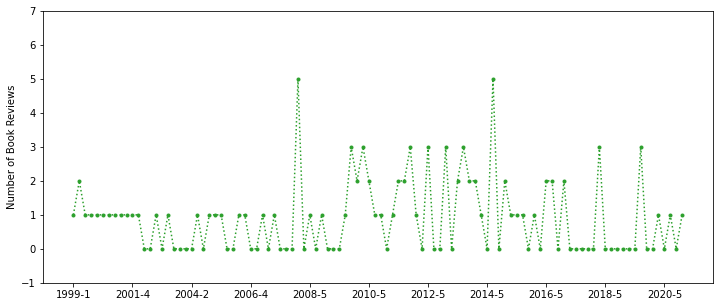

In [143]:
describe_book_review(info_issue)

In [144]:
# furhter analysis: after part 4

info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')
info_year = pd.read_csv(path+'\\info\\info_year_o_7.csv')

In [145]:
issue_group_help = info_issue['number_review'].groupby([info_issue['year']]).sum()

info_year['number_review'] = issue_group_help.values

In [147]:
info_year.to_csv(path+'\\info\\info_year_o_7.csv',index=False,sep=',')
info_year.head()

,year,article_quant,number_review
0,1999,20,4
1,2000,24,4
2,2001,23,4
3,2002,18,2
4,2003,19,1


In [148]:
info_year = pd.read_csv(path+'\\info\\info_year_o_7.csv')

In [153]:
def describe_book_review_year(info_year):
    
    x = info_year['year'].values
    y = info_year['number_review'].values
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Number of Book Reviews', fontsize=10)
    
    ax.set_ylim(-1,15)
    # ax.set_xticks(range(0,len(x),4))
    # ax.set_xticklabels() 
    
    ax.plot(x, y, color='#2ca02c', linestyle=':', marker='.')

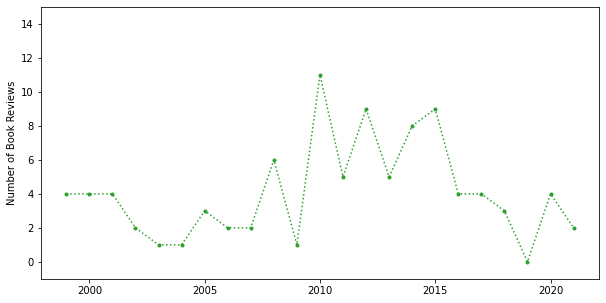

In [154]:
describe_book_review_year(info_year)

In [113]:
# part 4: number of articles per year

info_article = pd.read_csv(path+'\\info\\info_article_o_7.csv')
info_issue = pd.read_csv(path+'\\info\\info_issue_o_7.csv')

In [121]:
issue_group_help = info_issue['article_quant'].groupby([info_issue['year']]).sum()

year = issue_group_help._stat_axis.values.tolist()
article_quant = issue_group_help.values.tolist()

info_year = pd.DataFrame()

info_year['year'] = year
info_year['article_quant'] = article_quant

In [123]:
info_year.to_csv(path+'\\info\\info_year_o_7.csv',index=False,sep=',')
info_year.head()

,year,article_quant
0,1999,20
1,2000,24
2,2001,23
3,2002,18
4,2003,19


In [124]:
info_year = pd.read_csv(path+'\\info\\info_year_o_7.csv')

In [139]:
def describe_number_articles(info_year):
    
    x = info_year['year'].values
    y = info_year['article_quant'].values
    
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(1,1,1)
    
    ax.set_xlabel('')
    ax.set_ylabel('Number of Articles', fontsize=10)
    
    ax.set_ylim(0,100)
    # ax.set_xticks(range(0,len(x),4))
    # ax.set_xticklabels() 
    
    ax.plot(x, y, color='#9467bd', linestyle=':', marker='.')

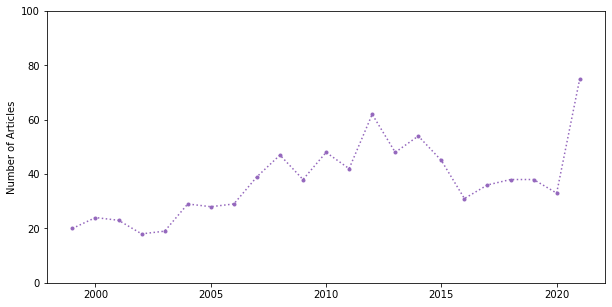

In [140]:
describe_number_articles(info_year)